# Capstone Project: Battle of the Neighbourhoods (Week 1 and 2)

For the final section of the Capstone project, I chose to use the Foursquare Data for the following business idea. 

## Introduction/Business Problem

Have you ever wondered what would happen to you when you grow old? Whether you would be able to walk by yourself, whether there would be someone to take care of you? One of my wishes for my future self is to be a part of a community when I grow old.

For this purpose, I am making my final Capstone project on locating an ideal Retirement home in Toronto that suits my interests. In doing so, i would consider its proximity to Community Centres, libraries, Places of Worship and general restaurants in the area. 

### Target Audience

As mentioned in the Project brief, a Data Science project needs to have a target audience. I believe this project would be useful to a large section of middle-aged individulas who are planning for their old-age. It would also provide insight to youth who want to ensure their loved ones are cared for and have access to multiple facilities according to their requirements. 

## Data

To first assess the various locations of Retirement homes in Toronto, i use data provided by the Toronto Open Data catalogue. 
https://open.toronto.ca/catalogue/?vocab_formats=CSV&vocab_topics=Locations%20and%20mapping&n=3&sort=score%20desc
I obtained datasets on Places of Worship and Air Conditioned Public Places and Cooling Centres as well. I will be using Foursquare to further assess the venues near to the filtered list of retirement homes to make the final choice. 

The Retirement home data would provide me information on the number of bed capacity and address of the home, allowing me to filter out the size and neighbourhood in which i want to choose. All the other data on amenities and venues nearby (Foursquare information) would allow me to filter out the homes till i reach the ideal one. 

For example, If I were a christian, I would choose a retirement home that was close to a church and as an avid reader, was close to a public library. Out of interest, using the Foursquare data, having information about venues nearby ( Is there a pizza place nearby?) would be beneficial. 

We are first going to open the csv file for Retirements homes to view the data

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
import csv
csv_path='https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/09559f8c-c4bb-45f8-b7c6-822a7ec2138d?format=csv&projection=4326'
df = pd.read_csv(csv_path,encoding='latin1')
df.head()

,_id,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,X,Y,LONGITUDE,LATITUDE,OBJECTID,ID,NAME,CAPACITY,geometry
0,1,8741406,155,Balmoral Ave,155 Balmoral Ave,M4V1J5,former TORONTO,Toronto,Balmoral Club,115001,20062243,155,NaN,NaN,NaN,2941,NaN,NaN,NaN,NaN,1,RH1,Amica at the Balmoral Club,66,"{u'type': u'Point', u'coordinates': (-79.40003..."
1,2,7641874,505,Kingston Rd,505 Kingston Rd,M4L1V5,former TORONTO,Toronto,Beaches Arms Retirement Residence,101002,7641869,505,NaN,NaN,NaN,3786,NaN,NaN,NaN,NaN,2,RH2,Beach Arms Retirement Lodge,80,"{u'type': u'Point', u'coordinates': (-79.30233..."
2,3,13972845,55,Belmont St,55 Belmont St,M5R1R1,former TORONTO,Toronto,Belmont House,115001,14014249,55,NaN,NaN,NaN,2988,NaN,NaN,NaN,NaN,3,RH3,Belmont House,90,"{u'type': u'Point', u'coordinates': (-79.39096..."
3,4,867488,180,Sheridan Ave,180 Sheridan Ave,M6K3C7,former TORONTO,Toronto,Bill McMurray Residence,101002,14018919,180,NaN,NaN,NaN,4394,NaN,NaN,NaN,NaN,4,RH4,Bill McMurray Residence,84,"{u'type': u'Point', u'coordinates': (-79.43469..."
4,5,7992815,54,Foxbar Rd,54 Foxbar Rd,M4V 2G6,former TORONTO,Toronto,Bradgate Arms Retirement Residence,101002,30017340,54,NaN,NaN,NaN,3459,NaN,NaN,NaN,NaN,5,RH5,Bradgate Arms,85,"{u'type': u'Point', u'coordinates': (-79.40059..."


As we can see, the latitude and longitude values are not present, furthermore the data needs to be cleaned to includde only the information that is required for the project. 

In [5]:
df2 = df.drop(columns=["GENERAL_USE_CODE","HI_NUM_SUF","LINEAR_NAME_ID","X","Y","geometry"])
df2.head()

,_id,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,LONGITUDE,LATITUDE,OBJECTID,ID,NAME,CAPACITY
0,1,8741406,155,Balmoral Ave,155 Balmoral Ave,M4V1J5,former TORONTO,Toronto,Balmoral Club,20062243,155,NaN,NaN,NaN,NaN,1,RH1,Amica at the Balmoral Club,66
1,2,7641874,505,Kingston Rd,505 Kingston Rd,M4L1V5,former TORONTO,Toronto,Beaches Arms Retirement Residence,7641869,505,NaN,NaN,NaN,NaN,2,RH2,Beach Arms Retirement Lodge,80
2,3,13972845,55,Belmont St,55 Belmont St,M5R1R1,former TORONTO,Toronto,Belmont House,14014249,55,NaN,NaN,NaN,NaN,3,RH3,Belmont House,90
3,4,867488,180,Sheridan Ave,180 Sheridan Ave,M6K3C7,former TORONTO,Toronto,Bill McMurray Residence,14018919,180,NaN,NaN,NaN,NaN,4,RH4,Bill McMurray Residence,84
4,5,7992815,54,Foxbar Rd,54 Foxbar Rd,M4V 2G6,former TORONTO,Toronto,Bradgate Arms Retirement Residence,30017340,54,NaN,NaN,NaN,NaN,5,RH5,Bradgate Arms,85


In [6]:
df3 = df2.drop(columns=["_id","CENTRELINE_ID", "LO_NUM", "LO_NUM_SUF", "HI_NUM", "OBJECTID","ID", "LATITUDE", "LONGITUDE"])
df3 = df3[df3.ADDRESS_POINT_ID !=8947520]
df3 = df3.reset_index()
df3.head()

,index,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,NAME,CAPACITY
0,0,8741406,155,Balmoral Ave,155 Balmoral Ave,M4V1J5,former TORONTO,Toronto,Balmoral Club,Amica at the Balmoral Club,66
1,1,7641874,505,Kingston Rd,505 Kingston Rd,M4L1V5,former TORONTO,Toronto,Beaches Arms Retirement Residence,Beach Arms Retirement Lodge,80
2,2,13972845,55,Belmont St,55 Belmont St,M5R1R1,former TORONTO,Toronto,Belmont House,Belmont House,90
3,3,867488,180,Sheridan Ave,180 Sheridan Ave,M6K3C7,former TORONTO,Toronto,Bill McMurray Residence,Bill McMurray Residence,84
4,4,7992815,54,Foxbar Rd,54 Foxbar Rd,M4V 2G6,former TORONTO,Toronto,Bradgate Arms Retirement Residence,Bradgate Arms,85


In [7]:
!pip install geopy
!pip install geopandas
from geopy.geocoders import Nominatim

     |████████████████████████████████| 931kB 7.3MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 35.1MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 38.9MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 19.7MB/s eta 0:00:01


We now use the geocoder package to assign the latitide and longitude values for the following addresses. 

In [8]:
import numpy as np

In [9]:
lat_lng_coords = None
#Create extra columns
df3['Latitude'] = pd.Series("", index=df.index)
df3['Longitude'] = pd.Series("", index=df.index)

df3.columns

Index(['index', 'ADDRESS_POINT_ID', 'ADDRESS_NUMBER', 'LINEAR_NAME_FULL',
       'ADDRESS_FULL', 'POSTAL_CODE', 'MUNICIPALITY', 'CITY', 'PLACE_NAME',
       'NAME', 'CAPACITY', 'Latitude', 'Longitude'],
      dtype='object')

In [10]:
address = "Kingston Rd, Toronto"

geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of former Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of former Toronto are 43.8042442, -79.1370614.


In [11]:
# loop until you get the coordinates
i= 0

sum_latitude = sum(df3['Latitude'] == '')

while sum_latitude > 0:
    print('Missing coordinates: '+ str(sum_latitude) + df3['ADDRESS_FULL'][i]+', i ='+str(i) ) 
    if df3['Latitude'][i] == '':
        try:
            # g = geocoder.google('{}, Toronto'.format(df3['MUNICIPALITY'][i]))
            
            geolocator = Nominatim(user_agent="http")
            address = '{}, Toronto'.format(df3['ADDRESS_FULL'][i])
            #address = 'Belmont St, Toronto'
            location = geolocator.geocode(address)
            # lat_lng_coords = g.latlng
            #if g.latlng != None:
            if location != None:                              
                df3['Latitude'][i]= location.latitude
                df3['Longitude'][i] = location.longitude
        except:
            break
    i = i+1
    sum_latitude = sum(df3['Latitude'] == '')


df3.head()

Missing coordinates: 56155 Balmoral Ave, i =0


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Missing coordinates: 55505 Kingston Rd, i =1
Missing coordinates: 5455 Belmont St, i =2
Missing coordinates: 53180 Sheridan Ave, i =3
Missing coordinates: 5254 Foxbar Rd, i =4
Missing coordinates: 51123 Spadina Rd, i =5
Missing coordinates: 50265 Queen's Dr, i =6
Missing coordinates: 49303 Queen's Dr, i =7
Missing coordinates: 4866 Roncesvalles Ave, i =8
Missing coordinates: 47251 St George St, i =9
Missing coordinates: 46165 Elm Ridge Dr, i =10
Missing coordinates: 45877 Yonge St, i =11
Missing coordinates: 44645 Castlefield Ave, i =12
Missing coordinates: 4317 Glebe Rd W, i =13
Missing coordinates: 421 Northwestern Ave, i =14
Missing coordinates: 41111 Avenue Rd, i =15
Missing coordinates: 40101 Lawton Blvd, i =16
Missing coordinates: 3984 Davisville Ave, i =17
Missing coordinates: 381140 Bloor St W, i =18
Missing coordinates: 37921 Millwood Rd, i =19
Missing coordinates: 364 Teddington Park Ave, i =20
Missing coordinates: 351035 Eglinton Ave W, i =21
Missing coordinates: 341238 Quee

,index,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,NAME,CAPACITY,Latitude,Longitude
0,0,8741406,155,Balmoral Ave,155 Balmoral Ave,M4V1J5,former TORONTO,Toronto,Balmoral Club,Amica at the Balmoral Club,66,43.6843,-79.4003
1,1,7641874,505,Kingston Rd,505 Kingston Rd,M4L1V5,former TORONTO,Toronto,Beaches Arms Retirement Residence,Beach Arms Retirement Lodge,80,43.6773,-79.3023
2,2,13972845,55,Belmont St,55 Belmont St,M5R1R1,former TORONTO,Toronto,Belmont House,Belmont House,90,43.6745,-79.3917
3,3,867488,180,Sheridan Ave,180 Sheridan Ave,M6K3C7,former TORONTO,Toronto,Bill McMurray Residence,Bill McMurray Residence,84,43.6516,-79.4347
4,4,7992815,54,Foxbar Rd,54 Foxbar Rd,M4V 2G6,former TORONTO,Toronto,Bradgate Arms Retirement Residence,Bradgate Arms,85,43.6866,-79.4008


We now use Foilum to map the data

In [12]:
!pip install folium
import folium

     |████████████████████████████████| 102kB 6.5MB/s ta 0:00:011


In [13]:
map_toronto_Rethome = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, name, address in zip(df3['Latitude'], df3['Longitude'], df3['NAME'], df3['ADDRESS_FULL']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_Rethome)  
    
map_toronto_Rethome

In [14]:
map_toronto_Rethome.save("map_toronto_Rethome.html")

In [15]:
import csv
csv_path1='https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/eafc9b0f-ba16-4be1-a196-304e35751b45?format=csv&projection=4326'
df4 = pd.read_csv(csv_path1,encoding='latin1')
df4.head()

,_id,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,X,Y,LONGITUDE,LATITUDE,OBJECTID,FTH_PRIORITY,FTH_ORGANIZATION,FTH_FAITH,FTH_DENOMINATION,FTH_GROUPING,FTH_PHONE,FTH_EXTENSION,FTH_FAX,FTH_CELL,FTH_HOME,FTH_SALUTATION,FTH_FIRST_NAME,FTH_LAST_NAME,FTH_POSITION,FTH_EMAIL,FTH_CONTACT,FTH_WEBSITE,FTH_FORUM,WARD_NAME,WARD_NUMBER,COMM_COUNCIL_NAME,COMM_COUNCIL_CODE,NEIGHBOURHOOD_NAME,geometry
0,1,850128,851,Ossington Ave,851 Ossington Ave,M6G3V2,former TORONTO,Toronto,Church Of Jesus Christ,109001,1143238,851,NaN,NaN,NaN,4125,NaN,NaN,NaN,NaN,1,NaN,Church Of Jesus Christ Of La,Christian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University-Rosedale (11),11,TORONTO AND EAST YORK COMMUNITY COUNCIL,SO,Dovercourt-Wallace Emerson-Junction (93),"{u'type': u'Point', u'coordinates': (-79.42613..."
1,2,10312972,1219,Dufferin St,1219 Dufferin St,M6H4C2,former TORONTO,Toronto,Dufferin St Baptist Church,109001,10312971,1219,NaN,NaN,NaN,557,NaN,NaN,NaN,NaN,2,NaN,Dufferin St Baptist Church,Christian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Davenport (9),9,TORONTO AND EAST YORK COMMUNITY COUNCIL,SO,Dovercourt-Wallace Emerson-Junction (93),"{u'type': u'Point', u'coordinates': (-79.43769..."
2,3,10877578,700,Dovercourt Rd,700 Dovercourt Rd,NaN,former TORONTO,Toronto,NaN,115001,14018294,700,NaN,NaN,NaN,3317,NaN,NaN,NaN,NaN,3,NaN,Dovercourt Presbyterian Chur,Christian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Davenport (9),9,TORONTO AND EAST YORK COMMUNITY COUNCIL,SO,Dufferin Grove (83),"{u'type': u'Point', u'coordinates': (-79.42892..."
3,4,6710178,1140,Bloor St W,1140 Bloor St W,M6H4E6,former TORONTO,Toronto,Dovercourt Baptist,109001,6710177,1140,NaN,NaN,NaN,458,NaN,NaN,NaN,NaN,4,NaN,Dovercourt Baptist Church,Christian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Davenport (9),9,TORONTO AND EAST YORK COMMUNITY COUNCIL,SO,Dovercourt-Wallace Emerson-Junction (93),"{u'type': u'Point', u'coordinates': (-79.43601..."
4,5,872604,524,St Clarens Ave,524 St Clarens Ave,M6H3W7,former TORONTO,Toronto,Belarusian Autocephalous,109001,1143779,524,NaN,NaN,NaN,4445,NaN,NaN,NaN,NaN,5,NaN,Belarussian Autocephlous,Christian,NaN,NaN,4165301025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Davenport (9),9,TORONTO AND EAST YORK COMMUNITY COUNCIL,SO,Dovercourt-Wallace Emerson-Junction (93),"{u'type': u'Point', u'coordinates': (-79.44299..."


In [16]:
df5 = df4.drop(columns=["_id","GENERAL_USE_CODE","CENTRELINE_ID","LO_NUM","LO_NUM_SUF","HI_NUM", "HI_NUM_SUF", "LINEAR_NAME_ID", "X", "Y", "LONGITUDE", "LATITUDE", "OBJECTID", "FTH_PRIORITY", "FTH_DENOMINATION", "FTH_GROUPING", "FTH_PHONE", "FTH_EXTENSION", "FTH_FAX", "FTH_CELL","FTH_HOME", "FTH_SALUTATION", "FTH_FIRST_NAME", "FTH_LAST_NAME", "FTH_POSITION","FTH_EMAIL","FTH_CONTACT","FTH_WEBSITE","FTH_FORUM", "WARD_NUMBER", "COMM_COUNCIL_CODE", "geometry"])
df5.head()

,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,FTH_ORGANIZATION,FTH_FAITH,WARD_NAME,COMM_COUNCIL_NAME,NEIGHBOURHOOD_NAME
0,850128,851,Ossington Ave,851 Ossington Ave,M6G3V2,former TORONTO,Toronto,Church Of Jesus Christ,Church Of Jesus Christ Of La,Christian,University-Rosedale (11),TORONTO AND EAST YORK COMMUNITY COUNCIL,Dovercourt-Wallace Emerson-Junction (93)
1,10312972,1219,Dufferin St,1219 Dufferin St,M6H4C2,former TORONTO,Toronto,Dufferin St Baptist Church,Dufferin St Baptist Church,Christian,Davenport (9),TORONTO AND EAST YORK COMMUNITY COUNCIL,Dovercourt-Wallace Emerson-Junction (93)
2,10877578,700,Dovercourt Rd,700 Dovercourt Rd,NaN,former TORONTO,Toronto,NaN,Dovercourt Presbyterian Chur,Christian,Davenport (9),TORONTO AND EAST YORK COMMUNITY COUNCIL,Dufferin Grove (83)
3,6710178,1140,Bloor St W,1140 Bloor St W,M6H4E6,former TORONTO,Toronto,Dovercourt Baptist,Dovercourt Baptist Church,Christian,Davenport (9),TORONTO AND EAST YORK COMMUNITY COUNCIL,Dovercourt-Wallace Emerson-Junction (93)
4,872604,524,St Clarens Ave,524 St Clarens Ave,M6H3W7,former TORONTO,Toronto,Belarusian Autocephalous,Belarussian Autocephlous,Christian,Davenport (9),TORONTO AND EAST YORK COMMUNITY COUNCIL,Dovercourt-Wallace Emerson-Junction (93)


In [17]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.0.2


In [18]:
data = df5.FTH_FAITH
Faith = pd.DataFrame(data,columns = ['FTH_FAITH']) 
Faith.head()

,FTH_FAITH
0,Christian
1,Christian
2,Christian
3,Christian
4,Christian


In [19]:
Faithind= pd.Index(Faith)
Faithind.value_counts()

(Christian,)      1074
(Jewish,)           67
(Buddhist,)         64
(Muslim,)           61
(Catholic,)         59
(Hindu,)            43
(Orthodox,)         12
(Sikh,)             11
(Other,)             7
(Unitarian,)         3
(Taoist,)            2
(Zoroastrian,)       1
(Jain,)              1
(Scientology,)       1
(Bahai,)             1
dtype: int64

In [20]:
data1= Faithind.value_counts()
FTH = pd.DataFrame(data1,columns = ['Faith']) 
FTH.head()

,Faith
"(Christian,)",1074
"(Jewish,)",67
"(Buddhist,)",64
"(Muslim,)",61
"(Catholic,)",59


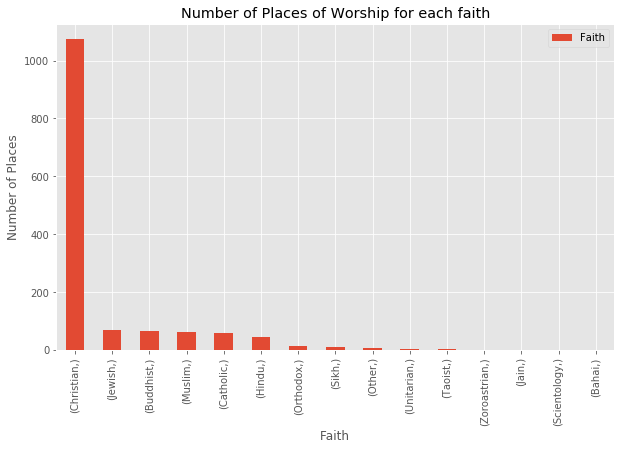

In [46]:
FTH.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Faith') # add to x-label to the plot
plt.ylabel('Number of Places') # add y-label to the plot
plt.title('Number of Places of Worship for each faith') # add title to the plot

plt.show()

Plotted the data for Hindu Temples

In [22]:
Hin =  df5['FTH_FAITH']=='Hindu'
Hindu = df5[Hin]
Hindu=Hindu.reset_index()
Hindu.head()

,index,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,FTH_ORGANIZATION,FTH_FAITH,WARD_NAME,COMM_COUNCIL_NAME,NEIGHBOURHOOD_NAME
0,1089,4368183,1270,Finch Ave W,1270 Finch Ave W,M3J3J7,NORTH YORK,Toronto,NaN,Toronto Shiva Satsangh,Hindu,York Centre (6),NORTH YORK COMMUNITY COUNCIL,York University Heights (27)
1,1096,10459161,190,Milvan Dr,190 Milvan Dr,M9L1Z9,NORTH YORK,Toronto,NaN,Toronto Hanuman Mandir Cultural Centre,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humber Summit (21)
2,1100,556263,102,Rivalda Rd,102 Rivalda Rd,M9M2M8,NORTH YORK,Toronto,NaN,Pranav Hindu Mandir,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humbermede (22)
3,1101,556263,102,Rivalda Rd,102 Rivalda Rd,M9M2M8,NORTH YORK,Toronto,NaN,Sidh Shakti Sh Baba Balak,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humbermede (22)
4,1103,9035799,38,Rivalda Rd,38 Rivalda Rd,M9M2M3,NORTH YORK,Toronto,NaN,Siva Vishnu Kovil,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humbermede (22)


In [24]:
Hindu.shape

(43, 16)

In [23]:
lat_lng_coords = None
#Create extra columns
Hindu['Latitude'] = pd.Series("", index=df.index)
Hindu['Longitude'] = pd.Series("",index=df.index)

Hindu.columns

Index(['index', 'ADDRESS_POINT_ID', 'ADDRESS_NUMBER', 'LINEAR_NAME_FULL',
       'ADDRESS_FULL', 'POSTAL_CODE', 'MUNICIPALITY', 'CITY', 'PLACE_NAME',
       'FTH_ORGANIZATION', 'FTH_FAITH', 'WARD_NAME', 'COMM_COUNCIL_NAME',
       'NEIGHBOURHOOD_NAME', 'Latitude', 'Longitude'],
      dtype='object')

In [25]:
address = "Kingston Rd, Toronto"

geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of former Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of former Toronto are 43.8042442, -79.1370614.


In [26]:
# loop until you get the coordinates
i= 0

sum_latitude1 = sum(Hindu['Latitude'] == '')
print('sum_latitude1 = '+ str(sum_latitude1))
while sum_latitude1 > 0:
    print('Missing coordinates: '+ str(sum_latitude1) + Hindu['ADDRESS_FULL'][i]+', i ='+str(i) ) 
    if Hindu['Latitude'][i] == '':
        try:
            # g = geocoder.google('{}, Toronto'.format(df3['MUNICIPALITY'][i]))
            
            geolocator = Nominatim(user_agent="http")
            address = '{}, Toronto'.format(Hindu['ADDRESS_FULL'][i])
            #address = 'Belmont St, Toronto'
            location = geolocator.geocode(address)
            # lat_lng_coords = g.latlng
            #if g.latlng != None:
            if location != None:                              
                Hindu['Latitude'][i]= location.latitude
                Hindu['Longitude'][i] = location.longitude
        except:
            break
    i = i+1
    sum_latitude1 = sum(Hindu['Latitude'] == '')


Hindu.head()


sum_latitude1 = 43
Missing coordinates: 431270 Finch Ave W, i =0


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Missing coordinates: 42190 Milvan Dr, i =1
Missing coordinates: 41102 Rivalda Rd, i =2
Missing coordinates: 40102 Rivalda Rd, i =3
Missing coordinates: 3938 Rivalda Rd, i =4
Missing coordinates: 38595 Albion Rd, i =5
Missing coordinates: 372400 Finch Ave W, i =6
Missing coordinates: 362400 Finch Ave W, i =7
Missing coordinates: 35130 Westmore Dr, i =8
Missing coordinates: 3461 Claireville Dr, i =9
Missing coordinates: 3312 Steinway Blvd, i =10
Missing coordinates: 322129 Albion Rd, i =11
Missing coordinates: 312691 Markham Rd, i =12
Missing coordinates: 3080 Brydon Dr, i =13
Missing coordinates: 29246 Brockport Dr, i =14
Missing coordinates: 28713 Jane St, i =15
Missing coordinates: 27722 Lansdowne Ave, i =16
Missing coordinates: 261871A Davenport Rd, i =17
Missing coordinates: 25243 Avenue Rd, i =18
Missing coordinates: 24983 Dupont St, i =19
Missing coordinates: 231279 Bloor St W, i =20
Missing coordinates: 22897 College St, i =21
Missing coordinates: 215637 Finch Ave E, i =22
Missin

,index,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,FTH_ORGANIZATION,FTH_FAITH,WARD_NAME,COMM_COUNCIL_NAME,NEIGHBOURHOOD_NAME,Latitude,Longitude
0,1089,4368183,1270,Finch Ave W,1270 Finch Ave W,M3J3J7,NORTH YORK,Toronto,NaN,Toronto Shiva Satsangh,Hindu,York Centre (6),NORTH YORK COMMUNITY COUNCIL,York University Heights (27),43.7642,-79.4881
1,1096,10459161,190,Milvan Dr,190 Milvan Dr,M9L1Z9,NORTH YORK,Toronto,NaN,Toronto Hanuman Mandir Cultural Centre,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humber Summit (21),43.7591,-79.566
2,1100,556263,102,Rivalda Rd,102 Rivalda Rd,M9M2M8,NORTH YORK,Toronto,NaN,Pranav Hindu Mandir,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humbermede (22),43.742,-79.5359
3,1101,556263,102,Rivalda Rd,102 Rivalda Rd,M9M2M8,NORTH YORK,Toronto,NaN,Sidh Shakti Sh Baba Balak,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humbermede (22),43.742,-79.5359
4,1103,9035799,38,Rivalda Rd,38 Rivalda Rd,M9M2M3,NORTH YORK,Toronto,NaN,Siva Vishnu Kovil,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humbermede (22),43.737,-79.535


In [27]:
Hindu.head()

,index,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,FTH_ORGANIZATION,FTH_FAITH,WARD_NAME,COMM_COUNCIL_NAME,NEIGHBOURHOOD_NAME,Latitude,Longitude
0,1089,4368183,1270,Finch Ave W,1270 Finch Ave W,M3J3J7,NORTH YORK,Toronto,NaN,Toronto Shiva Satsangh,Hindu,York Centre (6),NORTH YORK COMMUNITY COUNCIL,York University Heights (27),43.7642,-79.4881
1,1096,10459161,190,Milvan Dr,190 Milvan Dr,M9L1Z9,NORTH YORK,Toronto,NaN,Toronto Hanuman Mandir Cultural Centre,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humber Summit (21),43.7591,-79.566
2,1100,556263,102,Rivalda Rd,102 Rivalda Rd,M9M2M8,NORTH YORK,Toronto,NaN,Pranav Hindu Mandir,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humbermede (22),43.742,-79.5359
3,1101,556263,102,Rivalda Rd,102 Rivalda Rd,M9M2M8,NORTH YORK,Toronto,NaN,Sidh Shakti Sh Baba Balak,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humbermede (22),43.742,-79.5359
4,1103,9035799,38,Rivalda Rd,38 Rivalda Rd,M9M2M3,NORTH YORK,Toronto,NaN,Siva Vishnu Kovil,Hindu,Humber River-Black Creek (7),ETOBICOKE YORK COMMUNITY COUNCIL,Humbermede (22),43.737,-79.535


In [28]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

import numpy as np 

I plotted the Retirement Home Data and Hindu Temple data onto the same map

In [29]:

# create map of Toronto using latitude and longitude values from Nominatim
latitude= 43.6746709835
longitude= -79.3909635735

map_one = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, address in zip(df3['Latitude'], df3['Longitude'], df3['NAME'], df3['ADDRESS_FULL']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_one) 
    
    # add markers of Hindu temple locations to map 
for lat, lng, name, address in zip(Hindu['Latitude'], Hindu['Longitude'], Hindu['FTH_ORGANIZATION'], Hindu['ADDRESS_FULL']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_one)  

map_one

On observing the two maps on places of worship and the Retirement homes, I found that the best place to choose a retirement home is in the heart of Toronto city or near Scarborough. In Toronto city, the widely revered Iskcon temple is close to 3 Retirement homes. These Retirement homes were that of Belmont House, Hazelton Place and Eden Manor. In Scarborough one Retirement Home:Alexis Lodge Retirement Residence is close to two temples on Ellesmere Road, one belonging to Hindu Society Of Thru-Venk and the other, Periya Sivan Kovil.
Hence, in order to further narrow down the list, we will be using bed capacity and FourSquare data as follows. 

The number of beds in the retirement home is very important to me as it speaks of the size of the community. 

In [30]:
df3.loc[df3['NAME'] == "Belmont House"]

,index,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,NAME,CAPACITY,Latitude,Longitude
2,2,13972845,55,Belmont St,55 Belmont St,M5R1R1,former TORONTO,Toronto,Belmont House,Belmont House,90,43.6745,-79.3917


In [31]:
df3.loc[df3['NAME'] == "Hazleton Place"]


,index,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,NAME,CAPACITY,Latitude,Longitude
15,16,7979707,111,Avenue Rd,111 Avenue Rd,M5R3J8,former TORONTO,Toronto,Hazelton Place,Hazleton Place,170,43.6732,-79.3957


In [32]:
df3.loc[df3['NAME'] == "Eden Manor"]

,index,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,NAME,CAPACITY,Latitude,Longitude
9,10,873436,251,St George St,251 St George St,M5R2M2,former TORONTO,Toronto,NaN,Eden Manor,22,43.6729,-79.4019


In [33]:
df3.loc[df3['NAME'] == "Alexis Lodge Retirement Residence"]

,index,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,NAME,CAPACITY,Latitude,Longitude
39,40,6541651,707,Ellesmere Rd,707 Ellesmere Rd,M1P2W1,SCARBOROUGH,Toronto,NaN,Alexis Lodge Retirement Residence,32,43.7641,-79.2877


I prefer a Retirement home with a smaller bed capacity as it would allow me to receive closer attention than if there were alot of people. It would also allow me to build a tight community of a few number of people. Hence, i would shortlist Eden Manor and Alexis Lodge Retirement Residence with bed capacities 22 and 32 respectively. 

In [34]:
# The code was removed by Watson Studio for sharing.

My credentails: Raaga Srinivas


In [35]:
Rethome_latitude = df3.loc[9, 'Latitude'] 
Rethome_longitude = df3.loc[9, 'Longitude'] 

Rethome_name = df3.loc[9, 'NAME'] \

print('Latitude and longitude values of {} are {}, {}.'.format(Rethome_name, 
                                                               Rethome_latitude, 
                                                               Rethome_longitude))

Latitude and longitude values of Eden Manor are 43.672909, -79.401937.


Used Foursquare API

In [36]:
LIMIT = 100

radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Rethome_latitude, 
    Rethome_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=DCHKEQ2IFUU4GWFBZVJF3C04OOSH4C1JKG2MC4WH1AAKNZRG&client_secret=EPUSEZZHCXTQGRTYFET4S1TKDJT4B4RT2IQ13CTZVXIBQA5H&v=20200112&ll=43.672909,-79.401937&radius=1000&limit=100'

In [37]:
import requests
Rethome_results = requests.get(url).json()

In [38]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [39]:
from pandas.io.json import json_normalize
Rethome_venues = Rethome_results['response']['groups'][0]['items']
    
Rethome_nearby_venues = json_normalize(Rethome_venues) 

Rethome_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Rethome_nearby_venues = Rethome_nearby_venues.loc[:, Rethome_filtered_columns]

Rethome_nearby_venues['venue.categories'] = Rethome_nearby_venues.apply(get_category_type, axis=1)

Rethome_nearby_venues.columns = [col.split(".")[-1] for col in Rethome_nearby_venues.columns]

Rethome_nearby_venues.head(20)

,name,categories,lat,lng
0,Playa Cabana,Mexican Restaurant,43.676112,-79.401279
1,Ezra's Pound,Café,43.675153,-79.405858
2,L'Unita Restaurant,Italian Restaurant,43.674387,-79.396488
3,Mistura,Italian Restaurant,43.674285,-79.398426
4,Roti Cuisine of India,Indian Restaurant,43.674618,-79.408249
5,Joso's,Mediterranean Restaurant,43.674835,-79.396171
6,Big Crow,BBQ Joint,43.675896,-79.403680
7,Whole Foods Market,Grocery Store,43.671954,-79.395543
8,Bang & Olufsen Yorkville,Electronics Store,43.674831,-79.396611
9,5 Elements Espresso,Café,43.673695,-79.396037


In [40]:
# The code was removed by Watson Studio for sharing.

My credentails: Raaga Srinivas


In [41]:
Rethome_latitude1 = df3.loc[39, 'Latitude'] 
Rethome_longitude1 = df3.loc[39, 'Longitude'] 

Rethome_name1 = df3.loc[39, 'NAME'] \

print('Latitude and longitude values of {} are {}, {}.'.format(Rethome_name1, 
                                                               Rethome_latitude1, 
                                                               Rethome_longitude1))

Latitude and longitude values of Alexis Lodge Retirement Residence are 43.764112, -79.2877091.


In [42]:
LIMIT = 100

radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Rethome_latitude1, 
    Rethome_longitude1, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=DCHKEQ2IFUU4GWFBZVJF3C04OOSH4C1JKG2MC4WH1AAKNZRG&client_secret=EPUSEZZHCXTQGRTYFET4S1TKDJT4B4RT2IQ13CTZVXIBQA5H&v=20200112&ll=43.764112,-79.2877091&radius=1000&limit=100'

In [43]:
import requests
Rethome_results1 = requests.get(url).json()

In [44]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [45]:
from pandas.io.json import json_normalize
Rethome_venues = Rethome_results1['response']['groups'][0]['items']
    
Rethome_nearby_venues = json_normalize(Rethome_venues) 

Rethome_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Rethome_nearby_venues = Rethome_nearby_venues.loc[:, Rethome_filtered_columns]

Rethome_nearby_venues['venue.categories'] = Rethome_nearby_venues.apply(get_category_type, axis=1)

Rethome_nearby_venues.columns = [col.split(".")[-1] for col in Rethome_nearby_venues.columns]

Rethome_nearby_venues.head(20)

,name,categories,lat,lng
0,Highland Farms,Grocery Store,43.766246,-79.283132
1,KornerStones Bar and Grills,American Restaurant,43.763444,-79.291082
2,Burrito Boyz,Burrito Place,43.769161,-79.281632
3,All Reptiles,Pet Store,43.767391,-79.281381
4,Pizza Hut,Pizza Place,43.763546,-79.291636
5,Dairy Queen,Ice Cream Shop,43.767077,-79.281785
6,Chapters,Bookstore,43.772385,-79.282911
7,Hopper Hut,Sri Lankan Restaurant,43.766918,-79.282451
8,Canada Computers,Electronics Store,43.759356,-79.278931
9,Metro,Supermarket,43.771079,-79.282374


After scanning the types of places near both venues using the Foursquare data, the answer was a no-brainer! Although Alexis Lodge Retirement Residence had a bookstore, the sheer volume of restaurants and public placesnear Eden Manor blew me away  . There were museums, music stores a park and even a castle. Hence, i can firmly say that i would choose Eden Manor for a retirement given my current preferences. 

## Conclusion 

This Data Science course gave me a true insight into the unlimited possibilities of Data Analysis. It introduced me to a world i never knew existed and I take forward all the skills it taught me. As I am currently in the field of economics, I feel this skils will allow me to combine knowledge of economic policy and data analysis to create better projects in the future!